In [1]:
import os, sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import importlib.util


# Get current path from where script is executed
if os.name == 'nt':
    sep = '\\'
elif os.name == 'posix':
    sep = '/'
else:
    print(f'What is this OS? {os.name}')

path = os.getcwd()
pathToGDrive =  path[:-len(f'Code{sep}src{sep}project_CSP_MATH_571')]
path_datasets = pathToGDrive + f'DataSets{sep}trips{sep}'


#MapGenerator Lib
path_maps = path + f'{sep}mapGeneration{sep}mapGeneration.py'
spec = importlib.util.spec_from_file_location("mapGeneration", path_maps)
mp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mp)


In [172]:
savedFile = pathToGDrive + f'intermediate_data{sep}trips.pickle'

def saveData():
    df.to_pickle(savedFile)
    
def loadData():
    global df
    df = pd.read_pickle(savedFile)


In [3]:
def updateSamples():
    global df_sampled, df_sampled_a_lot
    df_sampled = df.sample(n=400_000, random_state=1)
    df_sampled_a_lot = df.sample(n=1_000, random_state=1)

### Load Data 

In [3]:
# Read csv
datasets = os.listdir(path_datasets)

df_list = []
for dataset in datasets:
    if dataset[-4:] == '.csv':
        df = pd.read_csv(path_datasets + dataset, index_col=None, header=0)
        df_list.append(df)


# Merge Taxis Data
df = pd.concat(df_list, axis=0, ignore_index=True)

del(df_list)

#df1 = pd.read_csv(path_datasets + 'jan-ap19.csv', delimiter=',')
#df2 = pd.read_csv(path_datasets + 'may-nov19.csv', delimiter=',')

# Merge Taxis Data of 2019
#df = pd.concat([df1,df2], axis=0, ignore_index=True)

#del(df1)
#del(df2)

df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,ececa29f7a1392f7d937f34a2040f409744d0354,8d1222551aa0783ed24c0941a29222b21fe66e643a801a...,2019-01-17 11:30:00 UTC,2019-01-17 12:00:00 UTC,1363.0,15.50,NaN,NaN,41.0,NaN,...,0.0,38.5,Cash,Flash Cab,41.794090,-87.592311,POINT (-87.592310855 41.794090253),NaN,NaN,NaN
1,1fbf17a48aca428fefc0a79d0218ed729ea7e8e3,c0efb2f0d92d8721d64fcd6628a9f8e78b7693cb5f36ee...,2019-03-02 09:45:00 UTC,2019-03-02 10:45:00 UTC,2754.0,13.73,NaN,NaN,46.0,NaN,...,0.0,37.5,Cash,Flash Cab,41.741243,-87.551428,POINT (-87.551428197 41.7412427285),NaN,NaN,NaN
2,73eab95221395356ad45ce8b7a8716bcddb4c034,5e00ac77728ae1790a517495300680a2ff69fe9a569218...,2019-02-12 11:15:00 UTC,2019-02-12 12:15:00 UTC,3422.0,31.77,NaN,NaN,8.0,NaN,...,0.0,76.5,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
3,701fcdd02b0dd0dc01cbffcd7c2c9572386f5966,e5e1bb9c3329c0f9bd1f291cb9bbbb016731c148fefca8...,2019-02-15 03:30:00 UTC,2019-02-15 03:45:00 UTC,1302.0,10.16,NaN,NaN,8.0,NaN,...,0.0,26.5,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
4,2984246ff88a9e42cb7d80d5a056a91592cd2103,0574d247700e50d1fb996084c8b1c649bf57effe419a6d...,2019-02-27 07:00:00 UTC,2019-02-27 07:45:00 UTC,2308.0,14.26,NaN,NaN,8.0,NaN,...,3.5,41.0,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN


In [4]:
df.shape

(8498882, 23)

For testing: 

### Some information about the dataset

In [6]:
qty_taxis = len(df['taxi_id'].drop_duplicates())
print(f'Quantity of taxis: {qty_taxis}')

Quantity of taxis: 1167


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498882 entries, 0 to 8498881
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_key              object 
 1   taxi_id                 object 
 2   trip_start_timestamp    object 
 3   trip_end_timestamp      object 
 4   trip_seconds            float64
 5   trip_miles              float64
 6   pickup_census_tract     float64
 7   dropoff_census_tract    float64
 8   pickup_community_area   float64
 9   dropoff_community_area  float64
 10  fare                    float64
 11  tips                    float64
 12  tolls                   float64
 13  extras                  float64
 14  trip_total              float64
 15  payment_type            object 
 16  company                 object 
 17  pickup_latitude         float64
 18  pickup_longitude        float64
 19  pickup_location         object 
 20  dropoff_latitude        float64
 21  dropoff_longitude       float64

In [8]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'],format=r"%Y-%m-%d %H:%M:%S UTC")
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'],format=r"%Y-%m-%d %H:%M:%S UTC")

### Preprocessing: Missing Values

We are not interested in NaN values in the Target Variable **(pickup_community_area)**

In [9]:
df = df.dropna(subset=['pickup_community_area'])

**Check the below assumption**

In [10]:
df = df.dropna(subset=['dropoff_community_area']) 

In [11]:
df.shape

(7665012, 23)

In [12]:
df.loc[:,'pickup_community_area'] = df.loc[:,'pickup_community_area'].astype('int64')
df.loc[:,'dropoff_community_area'] = df.loc[:,'dropoff_community_area'].astype('int64')

**Drop useless columns**

In [13]:
df = df.drop(columns=['company', 'pickup_latitude','pickup_longitude', 'pickup_location', 'dropoff_latitude',
                       'dropoff_longitude', 'dropoff_location'])

**Checking percentage of missing values**

In [14]:
100 * df.isnull().sum()/df.shape[0]

unique_key                 0.000000
taxi_id                    0.000000
trip_start_timestamp       0.000000
trip_end_timestamp         0.000000
trip_seconds               0.005062
trip_miles                 0.000130
pickup_census_tract       36.525853
dropoff_census_tract      36.525853
pickup_community_area      0.000000
dropoff_community_area     0.000000
fare                       0.000130
tips                       0.000130
tolls                     77.495599
extras                     0.000130
trip_total                 0.000130
payment_type               0.000000
dtype: float64

As we can see in the dataset description, pickup_census_tract and dropoff_census_tract have a high number of missing values due to user privacy, so we delete these columns.

In [15]:
df = df.drop(columns=['pickup_census_tract','dropoff_census_tract'])

#### Tolls

This value shouldn't be missing due to privacy. Let's check the possible values.

In [16]:
df['tolls'].unique()

array([nan,  0.])

In [17]:
df['tolls'].isna().sum()

5940047

'tolls' should be a predictor that indicates if the trip went through a toll. As we can see in the above cell, the values are just 0 or nan. 

Let's get insight in the trips where the values are nan. 

*Time Analysis*

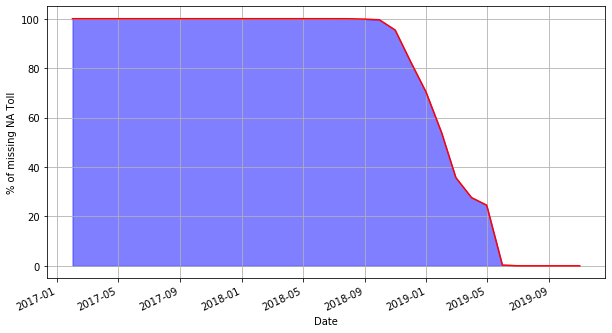

In [18]:
# Randomly group by start timestamp
df.index = df['trip_start_timestamp']
# Total elements
timeStart_grouped = df.groupby(pd.Grouper(freq='M'))
# Total NA elements
timeStart_tollNA_grouped = df.loc[df['tolls'].isna(),].groupby(pd.Grouper(freq='M'))

# Percentaje
y = 100 * timeStart_tollNA_grouped.size()/timeStart_grouped.size()
y = y[~y.isna()]

# Plot
plt.figure(figsize=(10,5))
plt.fill_between(y.index, y, color='blue', alpha=0.5)
plt.plot(y, color='red')
plt.grid()
plt.xticks(rotation=25, ha='right')
plt.xlabel('Date')
plt.ylabel('% of missing NA Toll')

plt.show()

As we can see, a little before 2019 values stopped being NAs. This is probably a new value that was added recently to the dataset.

Let's check the distribution prior to 2019, to see if it's random or maybe only some communities started using it.

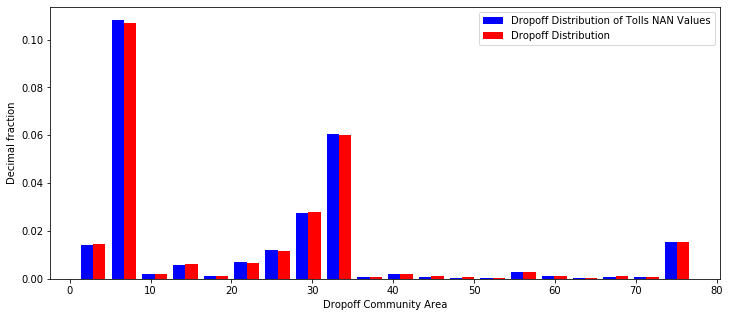

In [19]:
plt.figure(figsize=(12,5))
plt.hist([df.loc[df['tolls'].isna(),'dropoff_community_area']
          , df['dropoff_community_area']]
          , density=True
          , color=['blue','red']
          , label= ['Dropoff Distribution of Tolls NAN Values','Dropoff Distribution']
          , bins=20)

plt.xlabel('Dropoff Community Area')
plt.ylabel('Decimal fraction')
plt.legend()
plt.show()

As we can see in the above plot, the distribution of dropoff in the missing tolls samples is very similar to the whole distribution. Out assumption is that missed tolls is not related to the trip, so these nan values are random and we assume that all values are 0. Therefore this predictor does not provide any information, so we drop it.

Our hypothesis is that since in Chicago there are no many tolls, no taxi uses them.

In [20]:
df = df.drop(columns='tolls')

#### trip_miles, fare, tips, extras & trip_total

Due to the percentage of missing values of these columns is the same, we are going to check if the values are missing in the same rows.

In [21]:
n_missing = (df['trip_miles'].isna()).sum()

In [22]:
n_missing

10

In [23]:
cols_same_na = ['trip_miles','fare','tips','extras','trip_total']

index = df['trip_miles'].isna()
for i in range(1,len(cols_same_na)):
    index &= (df[cols_same_na[i]].isna())

result = 'They are the same rows! :)' if index.sum() == n_missing else "They are different rows :("
print(result)

They are the same rows! :)


As we see all columns missing in the same rows. Since 10 samples in a couple of millions is insignificant, we delete these 10 samples

In [24]:
df = df[~index]

#### trip_seconds

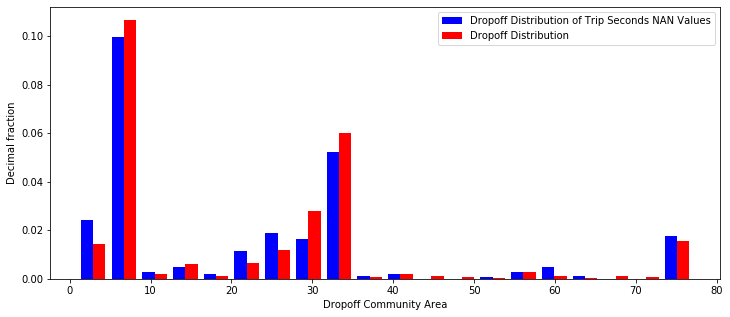

In [25]:
dropCA_tripSecNA = df.loc[df['trip_seconds'].isna(),'dropoff_community_area']
dropCA = df['dropoff_community_area']

plt.figure(figsize=(12,5))
plt.hist([dropCA_tripSecNA,dropCA]
         ,density=True
         ,color=['blue','red']
         ,label=['Dropoff Distribution of Trip Seconds NAN Values','Dropoff Distribution']
         ,bins=20)

plt.xlabel('Dropoff Community Area')
plt.ylabel('Decimal fraction')
plt.legend()
plt.show()

As we can see, the distribution of missing values in this columns seems to be random. We are going to replace them with the mean of similar trips (i.e same pick_up and dropoff community area)

In [26]:
def getMeanTripSeconds(row):
    
    index = (df['pickup_community_area'] == row['pickup_community_area'])
    index &= (df['dropoff_community_area'] == row['dropoff_community_area'])
    mean = df.loc[index,'trip_seconds'].mean()
    
    return mean

In [27]:
estimatedTripSec = df.loc[df['trip_seconds'].isna(),['pickup_community_area','dropoff_community_area']].apply(lambda row : getMeanTripSeconds(row), axis=1)

In [28]:
df.loc[df['trip_seconds'].isna(),'trip_seconds'] = estimatedTripSec

In [29]:
df.isna().sum()

unique_key                0
taxi_id                   0
trip_start_timestamp      0
trip_end_timestamp        0
trip_seconds              0
trip_miles                0
pickup_community_area     0
dropoff_community_area    0
fare                      0
tips                      0
extras                    0
trip_total                0
payment_type              0
dtype: int64

### Errors

In [148]:
initial_shape = df.shape

First of all, let's check the correlation between variables.

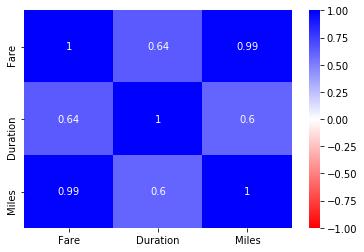

In [21]:
variables = ['fare','trip_seconds','trip_miles']

sns.heatmap(df[variables].corr()
            , annot = True
            , yticklabels=['Fare', 'Duration', 'Miles']
            , xticklabels=['Fare', 'Duration', 'Miles']
            , vmin=-1
            ,cmap='bwr_r'
           )


plt.show()


As we can see, there is a huge positive correlation between the variables fare, trip_seconds and trip_miles. Specially between Miles and Fare.
This makes sense.

#### Fare-Miles

By doing a little of research, we could get the real fare that taxis charge. The formula is:

*fare = 3.25 + 2.25 per miles + 0.2 per 36 seconds waiting*

Flash Cab Fare Calculation: https://www.taxiautofare.com/us/taxi-fare-card/Chicago-Flash-Cab-fare

In [6]:
# Miles-Fare Relationship for Flash Cab Company
mileFareRel = (np.arange(0,36) * 2.25) + 3.25

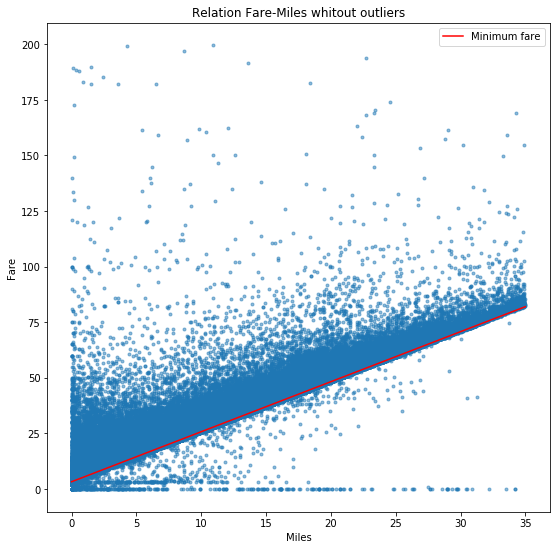

In [7]:
fig, ax = plt.subplots(figsize=(9,9))

df_FareMilesClean = df[(df['fare'] > 0) & (df['fare'] < 200) & (df['trip_miles'] > 0) & (df['trip_miles'] < 35)]

ax.plot(mileFareRel,color='red',label='Minimum fare')
ax.scatter(df_FareMilesClean['trip_miles'],df_FareMilesClean['fare'], marker='.', alpha=0.5)
ax.set_title('Relation Fare-Miles whitout outliers')
ax.set_ylabel('Fare')
ax.set_xlabel('Miles')
ax.legend(loc='upper right')


plt.show()

One thing we can be sure, is that values have to be between:
- 3.25 + 2.25 per miles

and

- 3.25 + 2.25 per miles + 0.2/36 per total time

Let's remove rows with values out of this line. It would be difficult to infer them.

In [78]:
old_df = df.shape

In [149]:
df = df.loc[
    # Bigger than min value
    (df['fare'] >= (df['trip_miles']* 2.25 + 3.25))
    
    # and
    &
    
    #Smaller than max value
    (df['fare'] <= ((df['trip_miles']* 2.25 + 3.25) + 0.2/36*df['trip_seconds']))
]

In [80]:
print("% of Wrong Fare Data erased: {:.2f}%".format(100 * (1-(df.shape[0]/old_df[0]))))

% of Wrong Fare Data erased: 1.56%


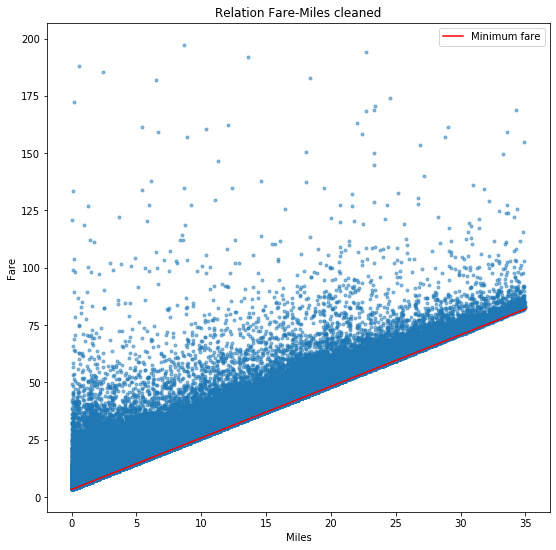

In [34]:
fig, ax = plt.subplots(figsize=(9,9))

df_FareMilesClean = df[(df['fare'] > 0) & (df['fare'] < 200) & (df['trip_miles'] > 0) & (df['trip_miles'] < 35)]

ax.plot(mileFareRel,color='red',label='Minimum fare')
ax.scatter(df_FareMilesClean['trip_miles'],df_FareMilesClean['fare'], marker='.', alpha=0.5)
ax.set_title('Relation Fare-Miles cleaned')
ax.set_ylabel('Fare')
ax.set_xlabel('Miles')
ax.legend(loc='upper right')


plt.show()

#### Fare - Duration

In [25]:
updateSamples()

Same as before, we get the minimum fare, depending on time this time:

- 3.25 + 0.2/36 per total time


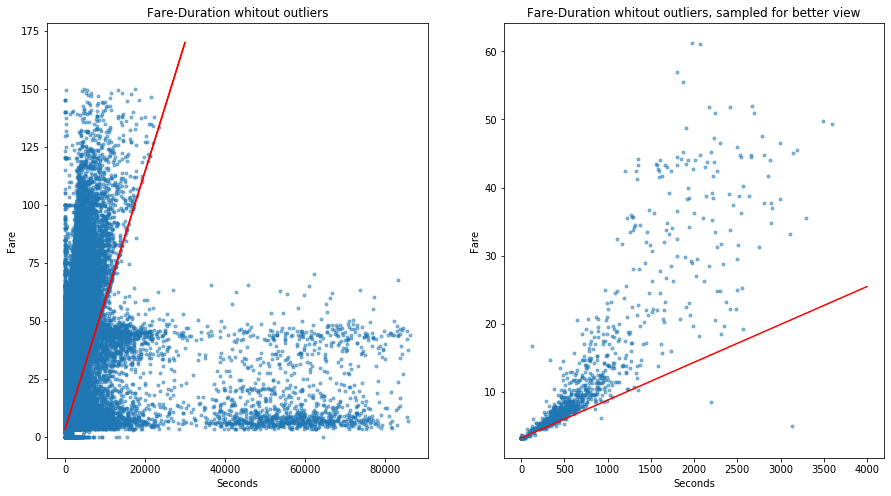

In [77]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

df_FareMilesClean = df[(df['fare'] < 150)]
df_FareMilesClean_sampled = df_sampled_a_lot[(df_sampled_a_lot['fare'] < 100) & (df_sampled_a_lot['trip_seconds'] < 3600)]

durationFareRelX = np.arange(0,30001,10000)
durationFareRelY = durationFareRelX * 0.2/36 + 3.25

ax[0].plot(durationFareRelX, durationFareRelY,color='red',label='Minimum fare')
ax[0].scatter(df_FareMilesClean['trip_seconds'],df_FareMilesClean['fare'], marker='.', alpha=0.5)
ax[0].set_title('Fare-Duration whitout outliers')
ax[0].set_ylabel('Fare')
ax[0].set_xlabel('Seconds')
ax[0].plot(durationFareRelX, durationFareRelY,color='red',label='Minimum fare')

durationFareRelX = np.arange(0,4001,1000)
durationFareRelY = durationFareRelX * 0.2/36 + 3.25

ax[1].scatter(df_FareMilesClean_sampled['trip_seconds'],df_FareMilesClean_sampled['fare'], marker='.', alpha=0.5)
ax[1].set_title('Fare-Duration whitout outliers, sampled for better view')
ax[1].set_ylabel('Fare')
ax[1].set_xlabel('Seconds')
ax[1].plot(durationFareRelX, durationFareRelY,color='red',label='Minimum fare')

plt.show()

In [81]:
old_df = df.shape

In [150]:
df = df.loc[
    # Bigger than min value
    (df['fare'] >= (df['trip_seconds']* 0.2/36 + 3.25))
]

In [83]:
print("% of Wrong Fare Data erased: {:.2f}%".format(100 * (1-(df.shape[0]/old_df[0]))))

% of Wrong Fare Data erased: 6.02%


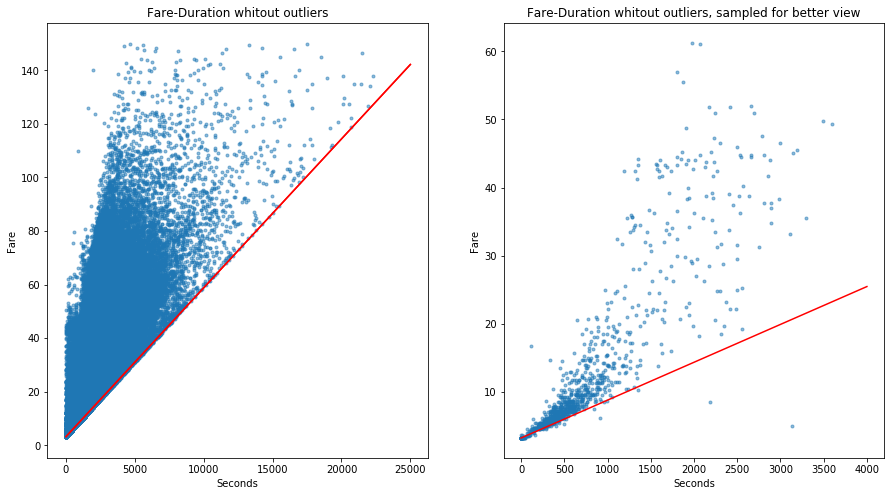

In [74]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

df_FareMilesClean = df[(df['fare'] < 150)]
df_FareMilesClean_sampled = df_sampled_a_lot[(df_sampled_a_lot['fare'] < 100) & (df_sampled_a_lot['trip_seconds'] < 3600)]

durationFareRelX = np.arange(0,25001,5000)
durationFareRelY = durationFareRelX * 0.2/36 + 3.25

ax[0].plot(durationFareRelX, durationFareRelY,color='red',label='Minimum fare')
ax[0].scatter(df_FareMilesClean['trip_seconds'],df_FareMilesClean['fare'], marker='.', alpha=0.5)
ax[0].set_title('Fare-Duration whitout outliers')
ax[0].set_ylabel('Fare')
ax[0].set_xlabel('Seconds')
ax[0].plot(durationFareRelX, durationFareRelY,color='red',label='Minimum fare')

durationFareRelX = np.arange(0,4001,1000)
durationFareRelY = durationFareRelX * 0.2/36 + 3.25

ax[1].scatter(df_FareMilesClean_sampled['trip_seconds'],df_FareMilesClean_sampled['fare'], marker='.', alpha=0.5)
ax[1].set_title('Fare-Duration whitout outliers, sampled for better view')
ax[1].set_ylabel('Fare')
ax[1].set_xlabel('Seconds')
ax[1].plot(durationFareRelX, durationFareRelY,color='red',label='Minimum fare')

plt.show()

#### Miles - Duration

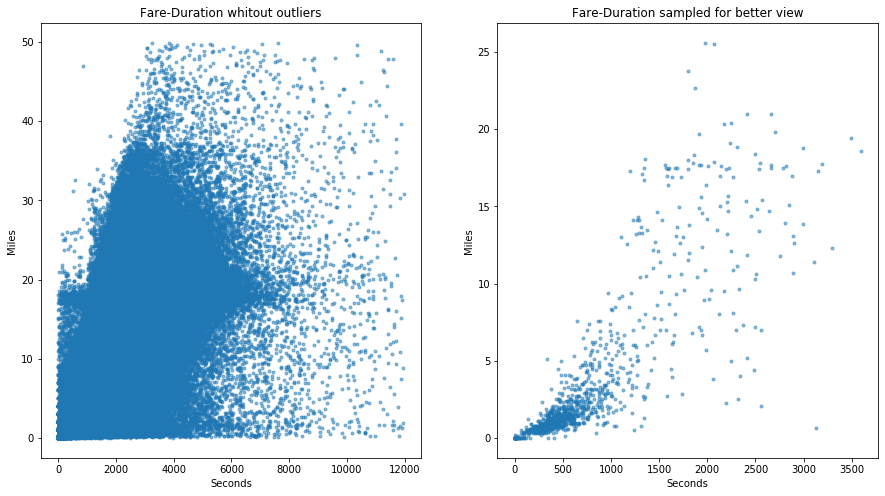

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

df_FareMilesClean = df[(df['trip_miles'] < 50) & (df['trip_seconds'] < 12000)]
df_FareMilesClean_sampled = df_sampled_a_lot[(df_sampled_a_lot['trip_miles'] < 40) & (df_sampled_a_lot['trip_seconds'] < 3600)]


ax[0].scatter(df_FareMilesClean['trip_seconds'],df_FareMilesClean['trip_miles'], marker='.', alpha=0.5)
ax[0].set_title('Fare-Duration whitout outliers')
ax[0].set_ylabel('Miles')
ax[0].set_xlabel('Seconds')

ax[1].scatter(df_FareMilesClean_sampled['trip_seconds'],df_FareMilesClean_sampled['trip_miles'], marker='.', alpha=0.5)
ax[1].set_title('Fare-Duration sampled for better view')
ax[1].set_ylabel('Miles')
ax[1].set_xlabel('Seconds')


plt.show()

- Trips with ++ time **&Implies;** ++ miles.

*This is not necessarily true. The taxi could have been waiting.*

- Trips with X miles **&Implies;** f(x) time.

Supposing that cars do every mile at a certain speed, we can imply that for every mile there is a minimum time that the we should have associated.

To try to avoid eliminating true values, let's assume that the cars go at very high speed (way above average): 50mph. This means, that for every mile in the trip, there should be at least 72 seconds of time. To avoid taking into account really short trips, let's put also a minimum miles condition.

Again, we have the following condition:



*if miles > 5:*
- seconds >= miles * 60


In [87]:
old_df = df.shape

In [151]:
df = df.loc[
    # Bigger than min value
    (df['trip_seconds'] >= (df['trip_miles']* 72))
    
    # or
    |
    
    # Trips don't make minimum miles condition
    (df['trip_miles'] < 5)
]

In [120]:
print("% of Wrong Fare Data erased: {:.2f}%".format(100 * (1-(df.shape[0]/old_df[0]))))

% of Wrong Fare Data erased: 0.31%


As we can see, the condition wasn't too restrictive

### Preprocessing: Check Errors

**Time Consistency**

Check how long trips usually take

*Note: (end-start != duration), because the end and start are rounded to the nearest 15 minutes.*

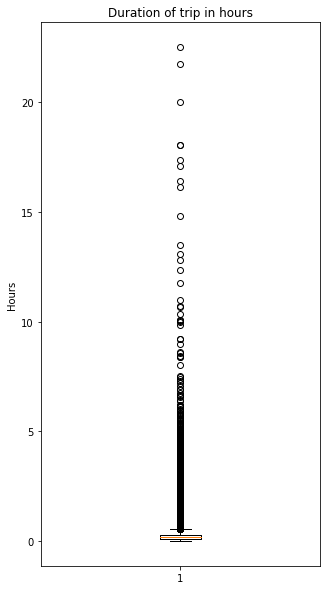

In [109]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(df['trip_seconds']/3600)
ax.set_title('Duration of trip in hours')
ax.set_ylabel('Hours')
plt.show()

We are working with so much data that the outliers won't let visualize correctly the boxplot.
As we can see there are taxi rides that last nearly a full day. However this can be possible. Maybe somebody who wouldn't mind paying lot's of money to get a private car. Of course the best way to ensure this is to contact the company.

In [94]:
q1, q3 = df['trip_seconds'].quantile([0.25, 0.75])
topWhisker = q3+1.5*(q3-q1)
qty = len(df.loc[df['trip_seconds'] > topWhisker,])
print(f'Quantity of outliers (>{topWhisker*60} mins): {qty}\nPercentaje: {round(qty/len(df)*100,2)}%')

hours = 3
qty = len(df.loc[df['trip_seconds'] > hours*3600,])
print(f'Quantity of trips that lasted more than {hours}h: {qty}\nPercentaje: {round(qty/len(df)*100,2)}%')

Quantity of outliers (>118800.0 mins): 585968
Percentaje: 8.29%
Quantity of trips that lasted more than 3h: 384
Percentaje: 0.01%


Let's check the histogram of outliers:

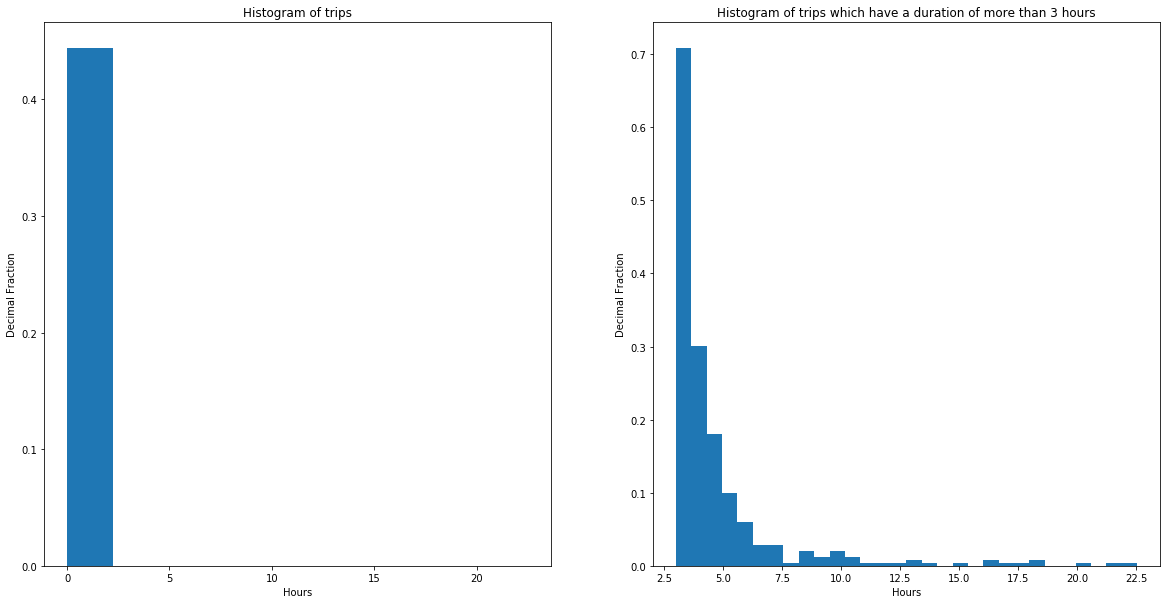

In [95]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax[0].hist(df['trip_seconds']/3600,density=True)
ax[0].set_title(f'Histogram of trips')
ax[0].set_ylabel('Decimal Fraction')
ax[0].set_xlabel('Hours')


ax[1].hist(df.loc[df['trip_seconds'] > hours*3600,]['trip_seconds']/3600,density=True,bins=30)
ax[1].set_title(f'Histogram of trips which have a duration of more than {hours} hours')
ax[1].set_ylabel('Decimal Fraction')
ax[1].set_xlabel('Hours')
plt.show()

There is a huge decrease on taxi trips that last more than around 5 hours.

Let's visualize the boxplot without the outliers to get a better visualization of tipical values.

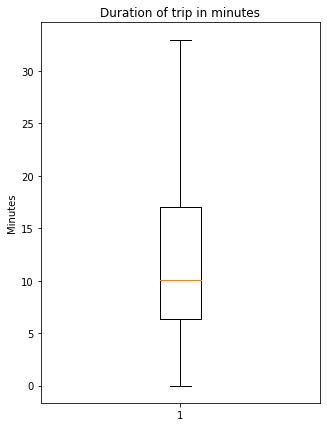

In [98]:
fig, ax = plt.subplots(figsize=(5,7))
ax.boxplot(df['trip_seconds']/60, showfliers=False)
ax.set_title('Duration of trip in minutes')
ax.set_ylabel('Minutes')
plt.show()

As we can see, there are many trips that still last very little. Trips that were maybe cancelled? Should we take them off? We are not interested in predicting trips that will be canceled. Where is the correct threshold to assume that a trip was canceled?

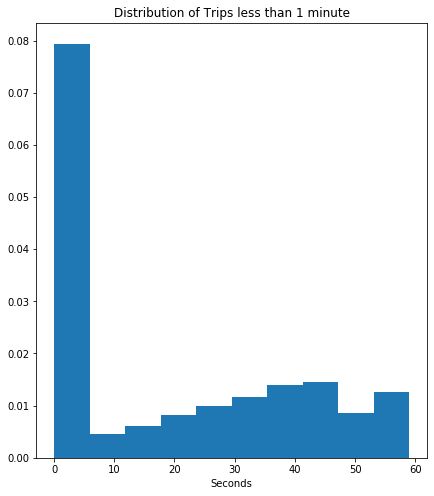

In [110]:
fig, ax = plt.subplots(figsize=(7,8))

plt.hist(df.loc[df['trip_seconds'] < 60,'trip_seconds'],density=True)
ax.set_title('Distribution of Trips less than 1 minute')
ax.set_xlabel('Seconds')

plt.show()

In [111]:
#Trips of 0 seconds
df[df['trip_seconds'] == 0].shape[0]

10717

In [154]:
df_less1Min = df[df['trip_seconds'] < 1*60]

*Time Analysis*

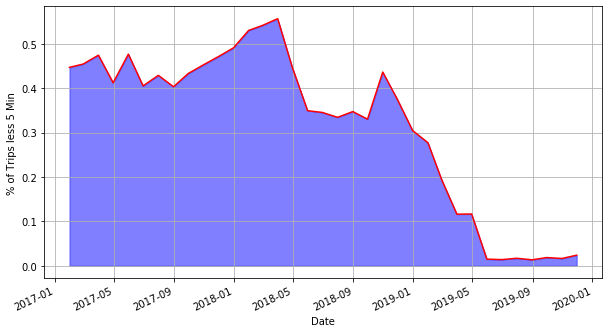

In [155]:
y = 100 * df_less1Min.groupby(pd.Grouper(freq='M')).size() / df.groupby(pd.Grouper(freq='M')).size()

# Plot
plt.figure(figsize=(10,5))
plt.fill_between(y.index, y, color='blue', alpha=0.5)
plt.plot(y, color='red')
plt.grid()
plt.xticks(rotation=25, ha='right')
plt.xlabel('Date')
plt.ylabel('% of Trips less 5 Min')

plt.show()

It seems that trips that smaller than 1 minute stop appearing after 2019...

Let's check the relation with miles and fare

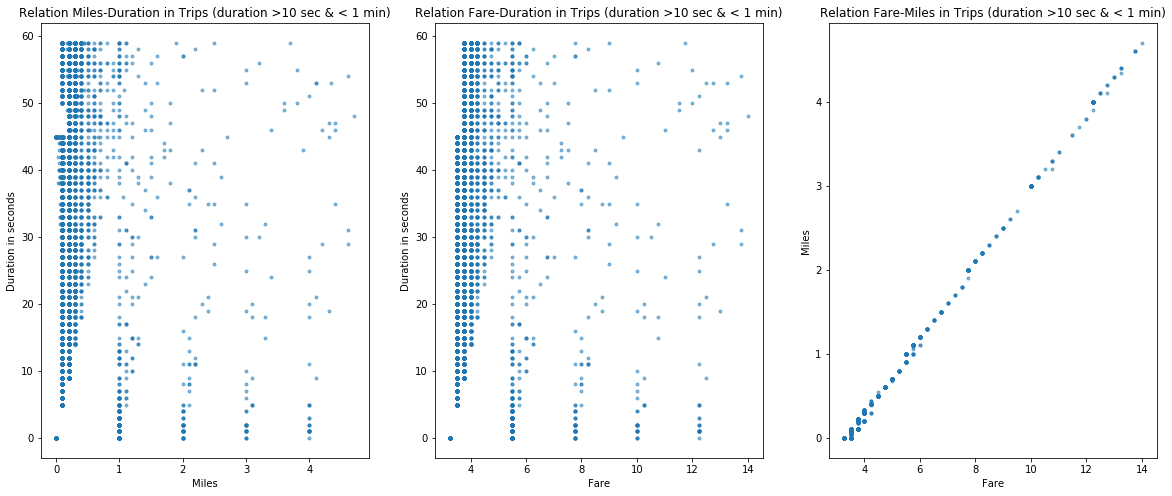

In [156]:
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(20,8))

ax[0].scatter(df_less1Min['trip_miles'], df_less1Min['trip_seconds'], marker='.', alpha=0.5)
ax[0].set_title('Relation Miles-Duration in Trips (duration >10 sec & < 1 min)')
ax[0].set_ylabel('Duration in seconds')
ax[0].set_xlabel('Miles')

ax[1].scatter(df_less1Min['fare'], df_less1Min['trip_seconds'], marker='.', alpha=0.5)
ax[1].set_title('Relation Fare-Duration in Trips (duration >10 sec & < 1 min)')
ax[1].set_ylabel('Duration in seconds')
ax[1].set_xlabel('Fare')

ax[2].scatter(df_less1Min['fare'], df_less1Min['trip_miles'], marker='.', alpha=0.5)
ax[2].set_title('Relation Fare-Miles in Trips (duration >10 sec & < 1 min)')
ax[2].set_ylabel('Miles')
ax[2].set_xlabel('Fare')
plt.show()

As we can see, a  because of our previous condition, there are no values with small times over 5 miles. However, we could probably get this condition down to 1 miles. It doesn't make sense to do  3 miles in 20 seconds as many trips are suggested in the graph.

Same applies to fare.

However, as we can see, the fare mile relation is perfect. 

What can we infer from this information?

Is it safe to say that the duration in seconds is wrong?

**Miles consistency**

Check average miles in trips

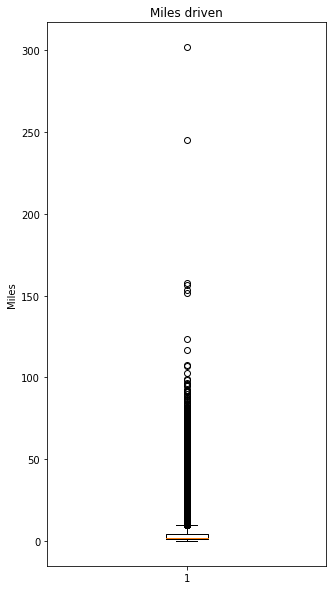

In [135]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(df['trip_miles'])
ax.set_title('Miles driven')
ax.set_ylabel('Miles')
plt.show()

Here we can see there are also many outliers. However, compared to the time, these seem much more concentrated near the top whisker. This make sense. Trips of more than 50 miles in Chicago don't make much sense. It could be interesting to check if long trips durations are correlated with long trips miles.

Let's visualize the boxplot without the outliers to get a better visualization of tipical values.

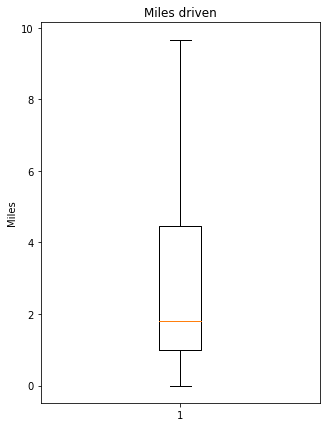

In [136]:
fig, ax = plt.subplots(figsize=(5,7))
ax.boxplot(df['trip_miles'], showfliers=False)
ax.set_title('Miles driven')
ax.set_ylabel('Miles')
plt.show()

**Fare consistency**

Check average fare in trips

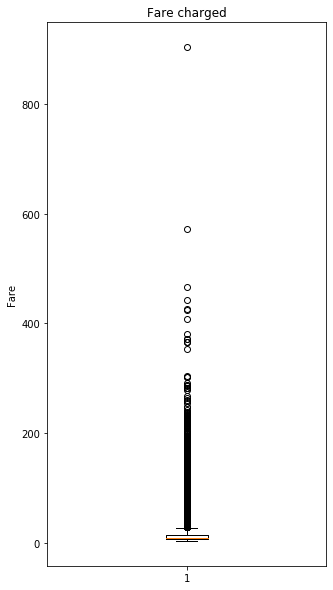

In [138]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(df['fare'])
ax.set_title('Fare charged')
ax.set_ylabel('Fare')
plt.show()

Here we can see there are also many outliers. However, compared to the time, these seem much more concentrated near the top whisker. This make sense. Trips of more than 50 miles in Chicago don't make much sense. It could be interesting to check if long trips durations are correlated with long trips miles.

Let's visualize the boxplot without the outliers to get a better visualization of tipical values.

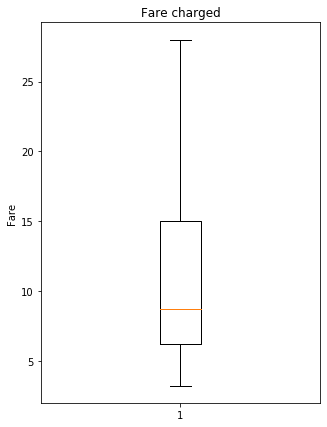

In [169]:
fig, ax = plt.subplots(figsize=(5,7))
ax.boxplot(df['fare'], showfliers=False)
ax.set_title('Fare charged')
ax.set_ylabel('Fare')
plt.show()

## Cleaning summary:

In [168]:
eliminations = initial_shape[0]-df.shape[0]
print(f"Total rows eliminated: {eliminations}")
print(f"Percentage: {round(eliminations/initial_shape[0]*100,2)}")

Total rows eliminated: 598427
Percentage: 7.81
